In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/RetinaFace/Pytorch_Retinaface

/content/drive/My Drive/RetinaFace/Pytorch_Retinaface


#Loss Plotting

In [0]:
    cd /content/drive/My Drive/RetinaFace/Pytorch_Retinaface/lossData

/content/drive/My Drive/RetinaFace/Pytorch_Retinaface/lossData


In [0]:
import pickle
def LossGarphPlotter(fileName,mode=0):#mode 0 for loss per image, mode 1 for total validation

    f=open(fileName,"rb")

    lossCollec=pickle.load(f)

    f.close()

    lossCollec
    ep=[]
    vl=[]
    tl=[]
    for ls in lossCollec:
        if(mode==0):
            ep.append(ls["Epoch"])
            tl.append(ls["TrainLoss"]/1231)
            vl.append(ls["ValLoss"]/351)
        else:
            ep.append(ls["Epoch"])
            # tl.append(ls["TrainLoss"]/1231)
            vl.append(ls["ValLoss"])

    # print(len(ep),len(vl))
    minVal=min(vl)
    minvl=[minVal]*len(ep)
    import matplotlib.pyplot as plt 
    plt.clf()
    plt.rcParams["figure.figsize"] = (15,10)
    # for x in a:
    #     # plotting the points

    if(mode==0):  
        plt.plot(ep,tl,"r",marker="o",markevery=[ep[tl.index(min(tl[1:]))]-1]) #x,y
        plt.plot(ep,vl,"g",marker="o",markevery=[ep[vl.index(min(vl[1:]))]-1])
    else:
        plt.plot(ep,vl,"g")
        plt.plot(ep,minvl,"b",linestyle="dashed",marker="o",markevery=[ep[vl.index(min(vl))]-1])
        # i=0 
        # while(i < len(ep)):
        #     print(ep[i],vl[i])
        #     i+=1


    # naming the x axis 
    plt.xlabel('Epoch') 
    # naming the y axis 
        
    # giving a title to my graph 
    if(mode==0):
        plt.ylabel("LOSS per image: Train (RED), Validation (GREEN)") 
        plt.title(fileName.strip(".pickle")+":  Loss(per image) Vs Epoch ") 
        plt.text(ep[len(ep)-1]*.65,tl[0]+(-tl[0]+vl[0])*0.5,"Validation Loss per image (min={0:.2f} at epoch {1})".format(min(vl[1:]),ep[vl.index(min(vl[1:]))]),fontsize=12,color="green")
        plt.text(ep[len(ep)-1]*.65,tl[0]+(-tl[0]+vl[0])*0.55,"Training Loss per image (min={0:.2f} at epoch {1})".format(min(tl[1:]),ep[tl.index(min(tl[1:]))]),fontsize=12,color="red")
        plt.savefig("./graphs/"+ fileName.strip(".pickle")+"-Loss_per_image.jpg")
        # plt.savefig( fileName.strip(".pickle")+"-Loss_per_image.jpg")
    else:
        plt.ylabel('LOSS: Validation (GREEN)') 
        plt.title(fileName.strip(".pickle")+":  Total Validation Loss Vs Epoch ") 
        plt.text(ep[len(ep)-1]*.65, vl[0]+(vl[len(vl)-1]-vl[0])*0.5,"Total Validation Loss",fontsize=12,color="green")
        plt.text(ep[len(ep)-1]*.65, vl[0]+(vl[len(vl)-1]-vl[0])*0.55,"Min Value is {0:.2f} at epoch {1}".format(minVal,ep[vl.index(min(vl))]),fontsize=12,color="blue")
        plt.savefig("./graphs/"+ fileName.strip(".pickle")+"-Loss_total_validation.jpg")
        # plt.savefig( fileName.strip(".pickle")+"-Loss_total_validation.jpg")

    # function to show the plot 
    plt.show() 


['newFineTuneHeads.pickle', 'FTClass5Head.pickle', 'LRe6_7.pickle', 'LRe5.pickle', 'AdamLRe3.pickle', 'LRe4.pickle', 'Adam_WC1.pickle', 'graphs']


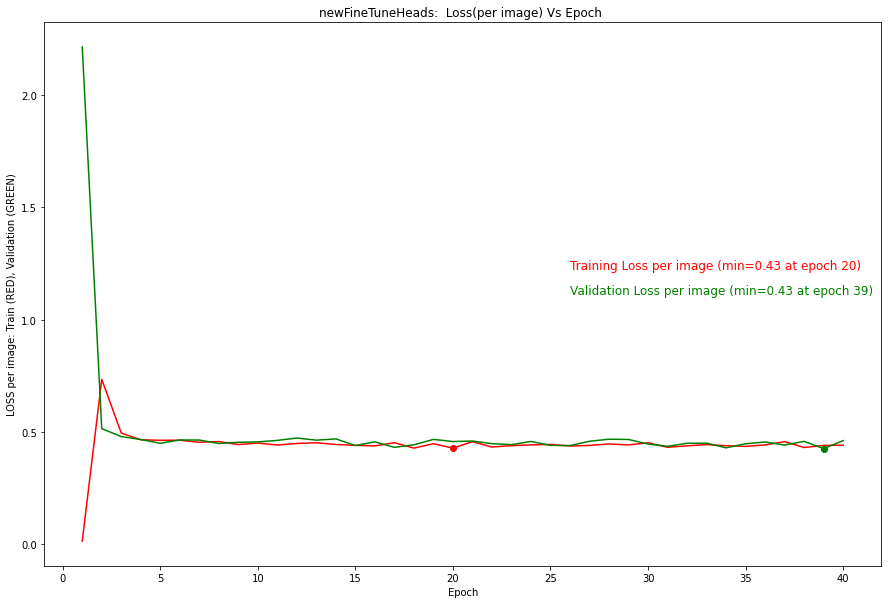

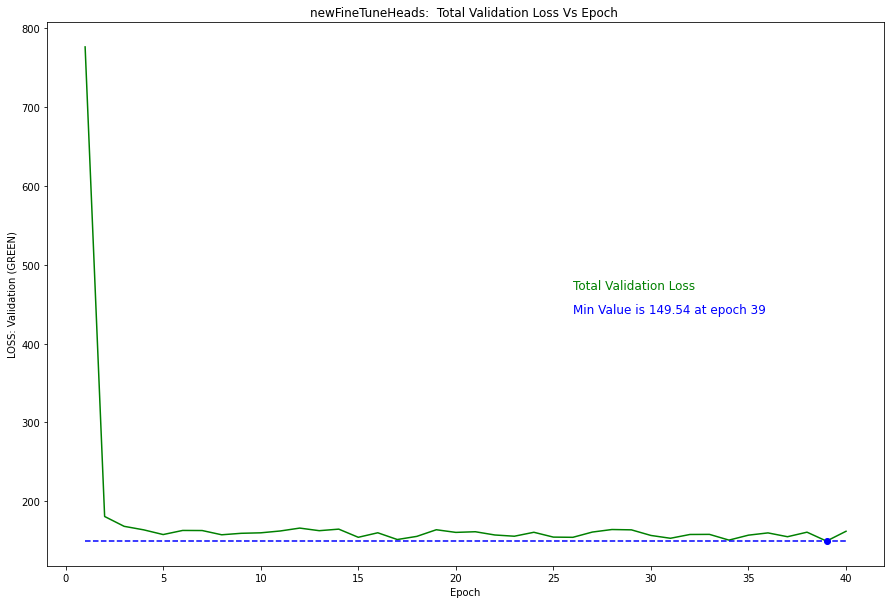

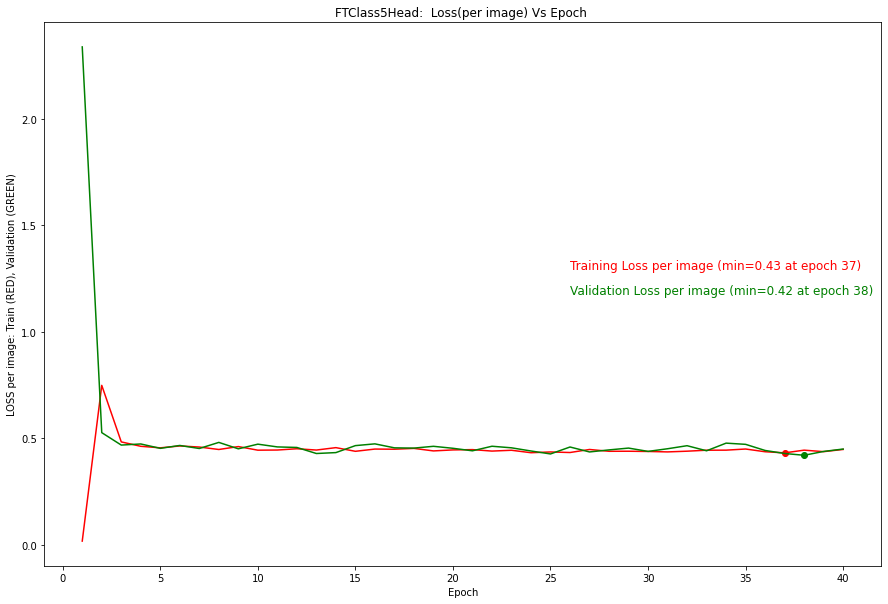

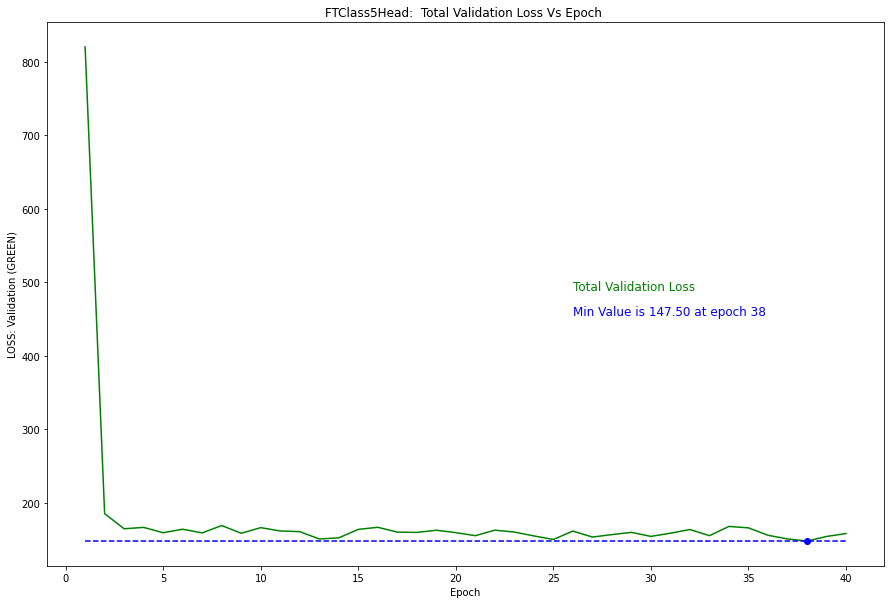

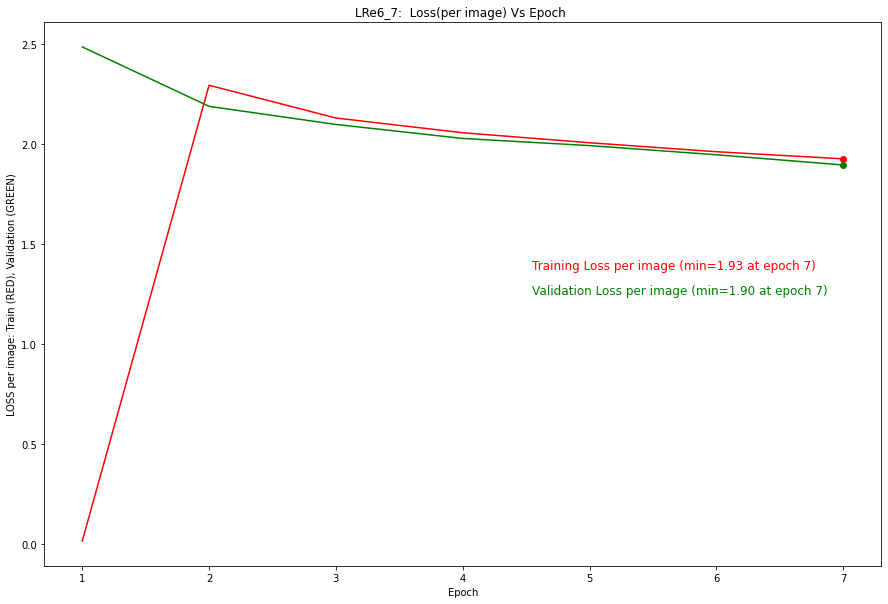

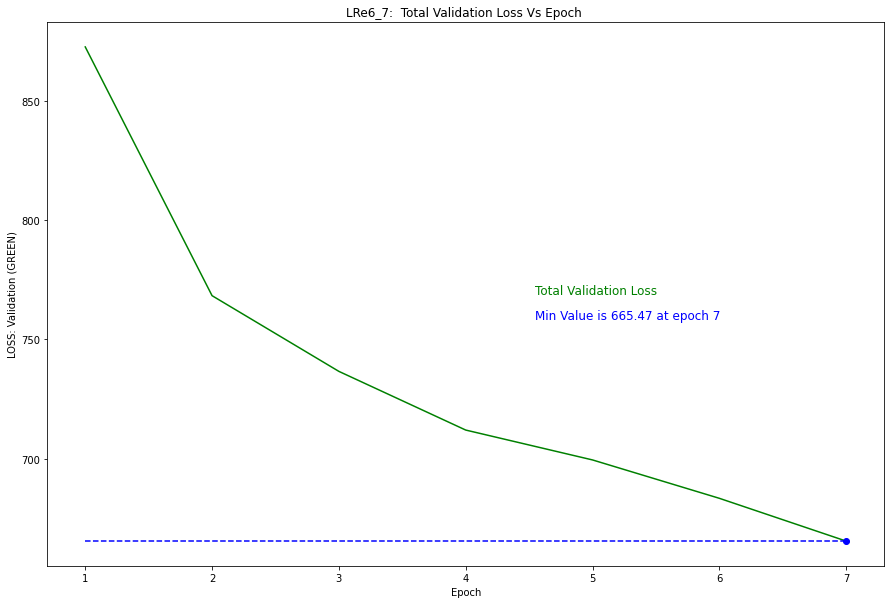

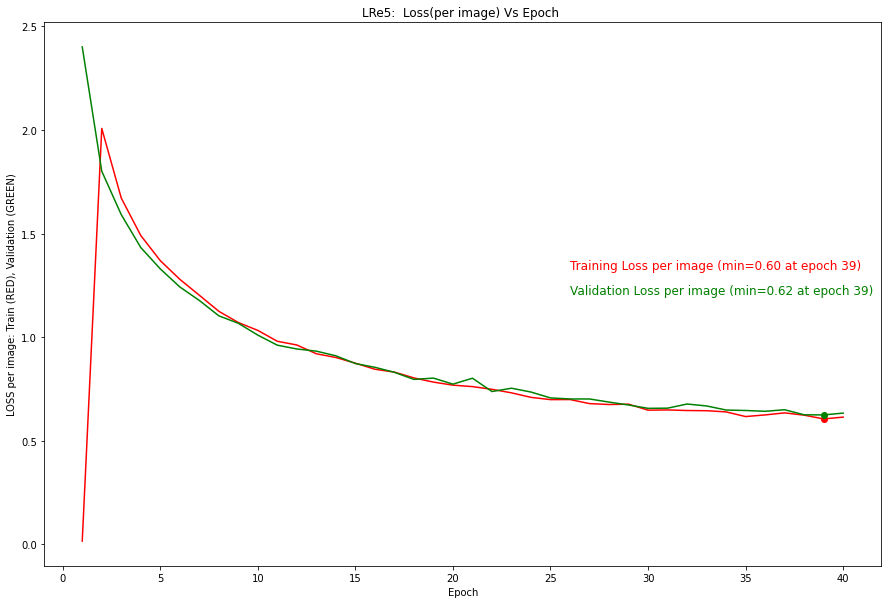

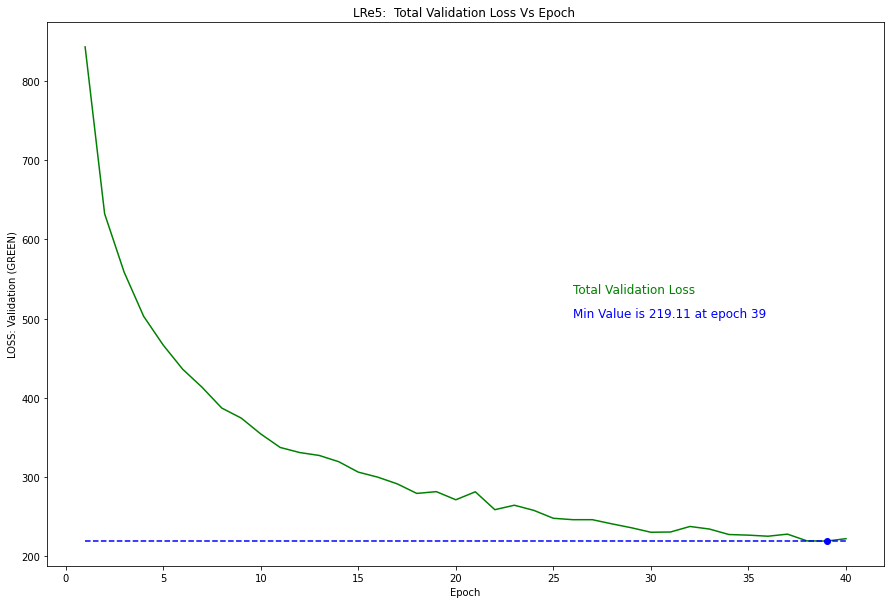

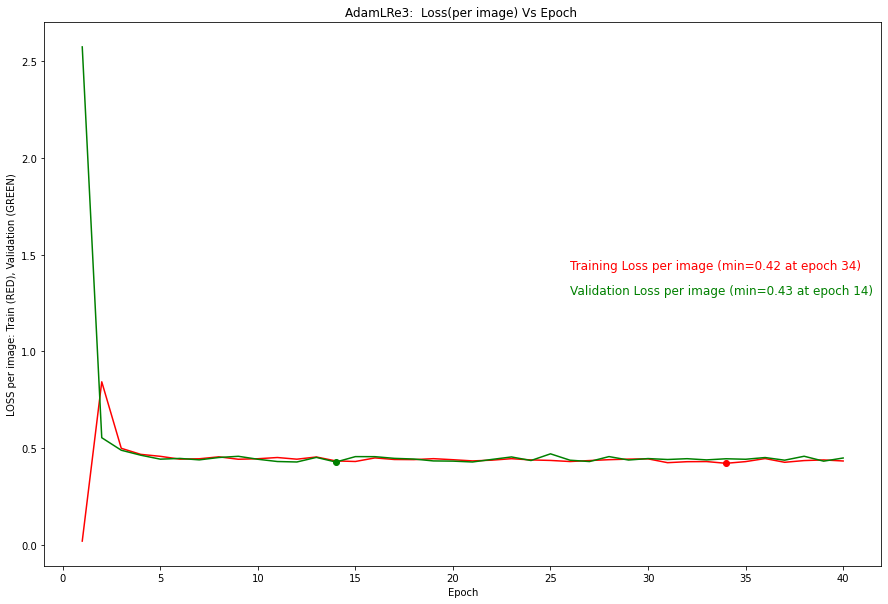

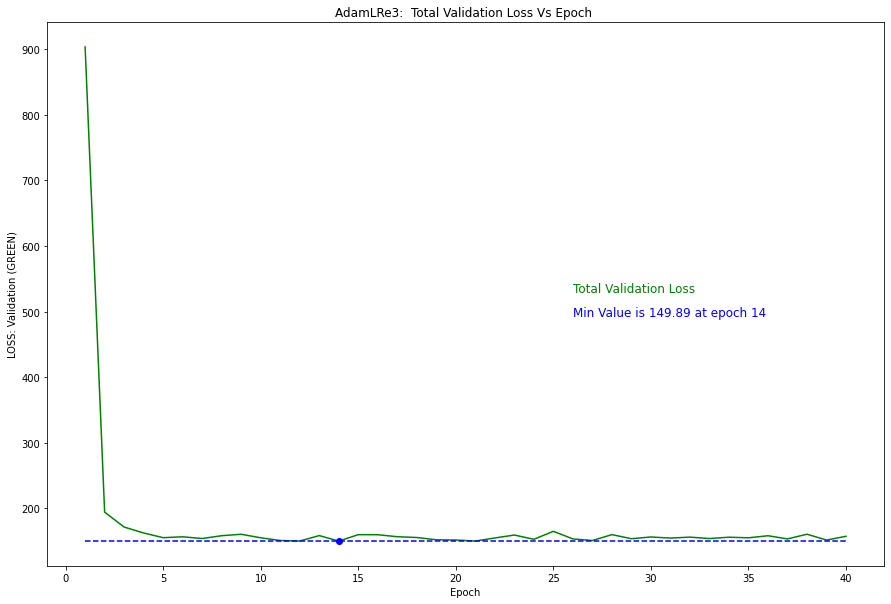

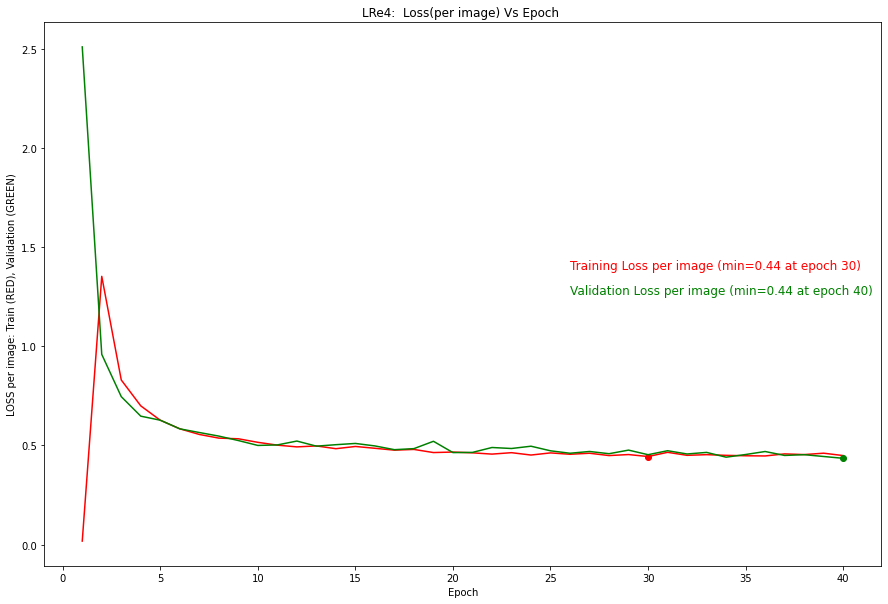

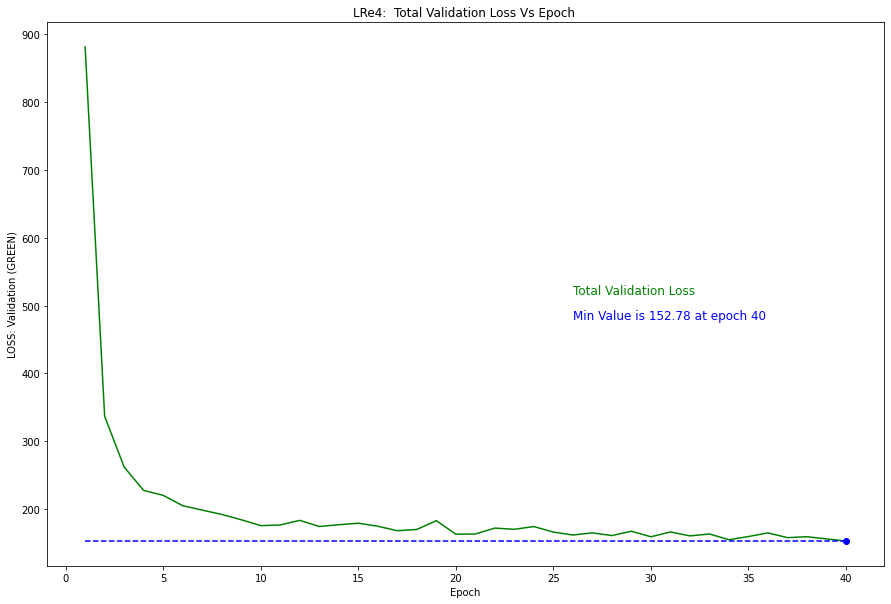

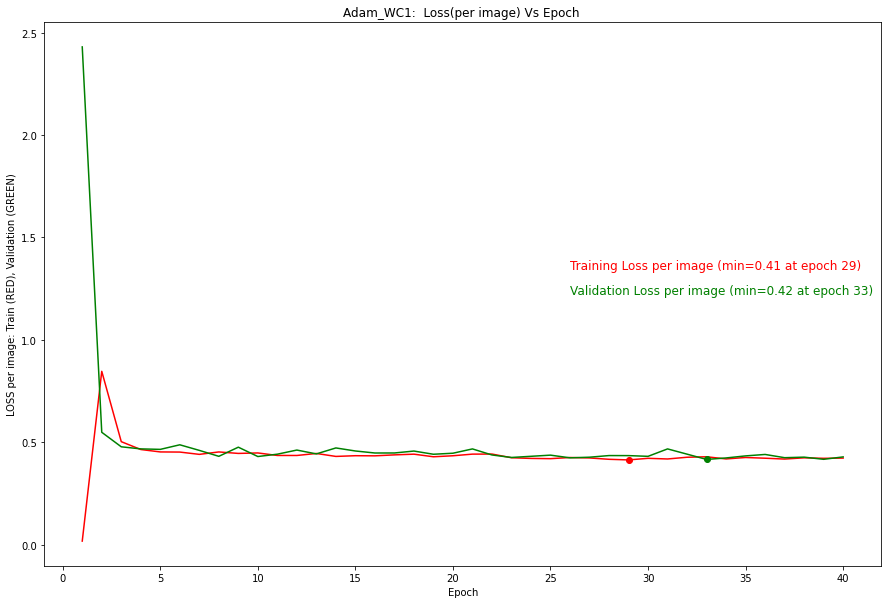

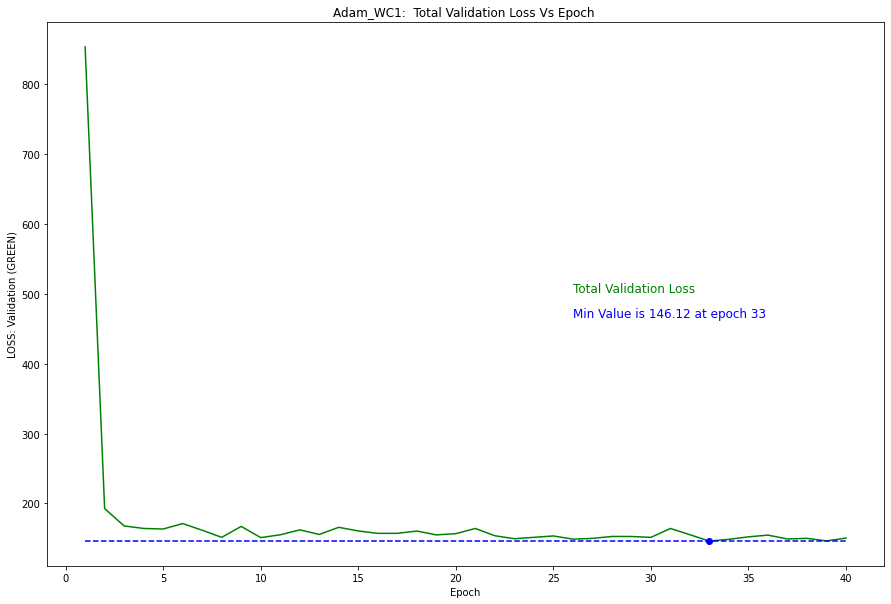

In [0]:
import os
lister=os.listdir()
print(lister)
for l in lister:
    if(l=="graphs"or l==".ipynb_checkpoints"):
        continue
    else:
        LossGarphPlotter(l,0)
        LossGarphPlotter(l,1)


#mAP plotter

In [0]:
cd /content/drive/My Drive/RetinaFace/Pytorch_Retinaface/widerface_evaluate/widerface_txt

/content/drive/My Drive/RetinaFace/Pytorch_Retinaface/widerface_evaluate/widerface_txt


In [0]:
a=open("Resnet50_Final/results.txt","r")
lines=a.readlines()
print(lines)

['[0.5, 0.7501038202779122]\n', '[0.55, 0.6701825180830422]\n', '[0.6, 0.5825953087477012]\n', '[0.65, 0.46750895162361483]\n', '[0.7, 0.3186281831263953]\n', '[0.75, 0.16988771451182702]\n', '[0.8, 0.08538404285066174]\n', '[0.8500000000000001, 0.023853158997359288]\n', '[0.9, 0.0021305833872763413]\n', '[0.95, 3.310485373265642e-05]\n', '===============================================\n', 'mAP is : 0.3070307386459522']


In [0]:
import os
def mAP_plotter(fileName):
    i=2
    ep=[]
    maps=[]
    ref=[]
    # read reference
    a=open("Resnet50_Final/results.txt","r")
    lines=a.readlines()
    refMAP=float(lines[11].strip("mAP is : "))
    a.close()

    # fileName="LRe4"
    pathsaver="/content/drive/My Drive/RetinaFace/Pytorch_Retinaface/HyperparameterTuning/"+fileName
    if not os.path.exists(pathsaver):
        os.makedirs(pathsaver)
    ep.append(0)
    maps.append(0.25943780658844107)
    ref.append(refMAP)

    f=open(pathsaver+"/"+fileName+"-mAP textData.txt","w")
    while(i<=38):
        ep.append(i)
        ref.append(refMAP)
        a=open("Resnet50_epoch_{}_noGrad_FT_".format(i)+fileName+"/results.txt")

        lines=a.readlines()
        print(i,"==============>\t",float(lines[11].strip("mAP is : ")))
        f.write(str(i)+" ==============>\t"+str(float(lines[11].strip("mAP is : ")))+"\n")
        maps.append(float(lines[11].strip("mAP is : ")))
        i+=2
        a.close()
    f.close()
    if(maps[1]<maps[0]):
        maps[0]=maps[1]
    import matplotlib.pyplot as plt 
    plt.rcParams["figure.figsize"] = (15,10)
    # for x in a:
    #     # plotting the points 
    plt.clf()
    maxmap=[max(maps)]*len(ep) 
    a,b=(max(maps),maps.index(max(maps)))
    plt.plot(ep,maps,"r") #x,y
    plt.plot(ep,ref,"g",linestyle="dashed") #x,y
    markerEpochValue=ep[maps.index(max(maps))]
    plt.plot(ep,maxmap,"b",linestyle="dashed",marker="o",markevery=[b]) #x,y
    # plt.plot(ep,vl,"g")
    # naming the x axis 
    plt.xlabel('Epoch') 
    # naming the y axis 
    plt.ylabel('mAP') 


    plt.text(ep[len(ep)-1]*.6, maps[0]+(maps[len(maps)-1]-maps[0])*0.5,"∘Reference mAP at pretrained widerface = {0:.3f}".format(refMAP),fontsize=12,color="green")
    plt.text(ep[len(ep)-1]*.6, maps[0]+(maps[len(maps)-1]-maps[0])*0.55,"∘mAP data for "+ fileName,fontsize=12,color="red")
    plt.text(ep[len(ep)-1]*.6, maps[0]+(maps[len(maps)-1]-maps[0])*0.6,"∘Max mAP is {0:.3f} at epoch {1}".format(a,ep[b]),fontsize=12,color="blue")
    # giving a title to my graph 
    plt.title(fileName+":   mAP vs epoch") 
    pathsaver="/content/drive/My Drive/RetinaFace/Pytorch_Retinaface/HyperparameterTuning/"+fileName
    if not os.path.exists(pathsaver):
        os.makedirs(pathsaver)
    plt.savefig(pathsaver+"/"+fileName+"-mAP Data.jpg")
    # function to show the plot 
    plt.show() 

2 ==============>	 0.2841962378587411
4 ==============>	 0.2746087496649353
6 ==============>	 0.30048521037410436
8 ==============>	 0.3076207938406998
10 ==============>	 0.3098095516090994
12 ==============>	 0.31801448019417533
14 ==============>	 0.29790603686001105
16 ==============>	 0.2949203661663622
18 ==============>	 0.2918700744836215
20 ==============>	 0.31785363293860486
22 ==============>	 0.30243081615892886
24 ==============>	 0.3187219442047258
26 ==============>	 0.3072510450350775
28 ==============>	 0.3231823583178035
30 ==============>	 0.2979458879651129
32 ==============>	 0.31354320995099527
34 ==============>	 0.3138781589528577
36 ==============>	 0.29415239355708883
38 ==============>	 0.30588703728929134


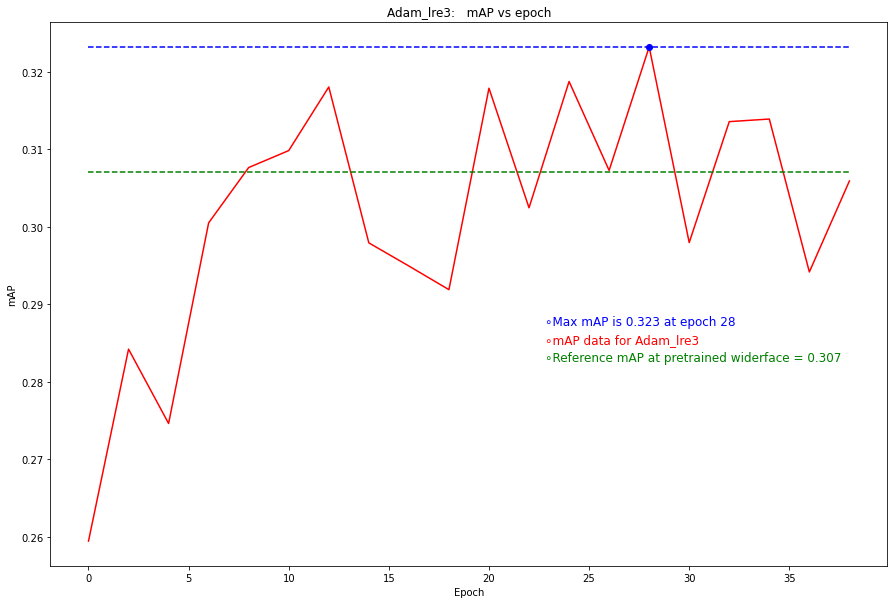

2 ==============>	 0.2795788000428462
4 ==============>	 0.2849391491985332
6 ==============>	 0.3091223751808648
8 ==============>	 0.3071323317600034
10 ==============>	 0.3118581761198119
12 ==============>	 0.3126338451274267
14 ==============>	 0.3118263278160883
16 ==============>	 0.30993075853682395
18 ==============>	 0.3072042015096257
20 ==============>	 0.3060783747570967
22 ==============>	 0.3048176580326958
24 ==============>	 0.3078975037920527
26 ==============>	 0.3114665490577733
28 ==============>	 0.3153194110239812
30 ==============>	 0.31423095584611893
32 ==============>	 0.30041162395039994
34 ==============>	 0.30833933736522373
36 ==============>	 0.31128014079536664
38 ==============>	 0.31075116389051866


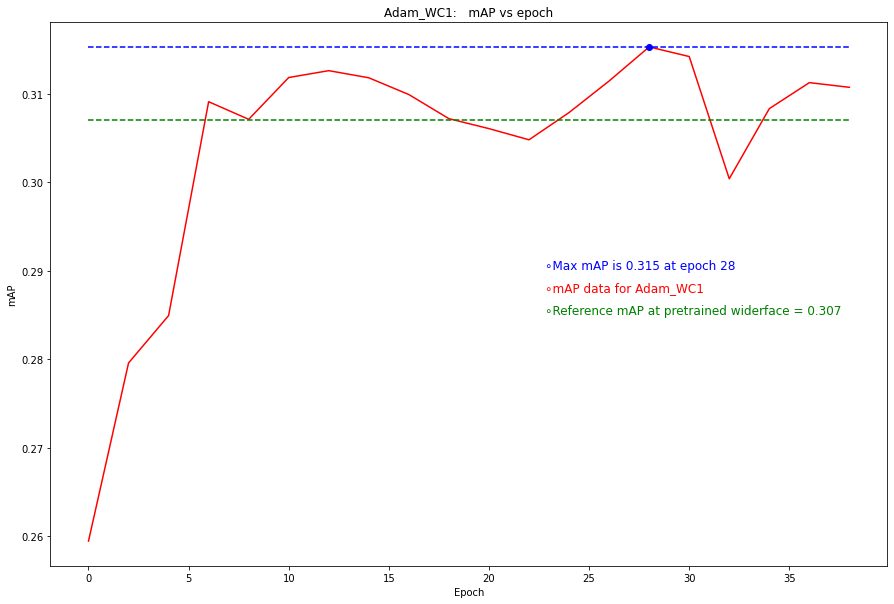

2 ==============>	 0.14231939680701805
4 ==============>	 0.17890274528454433
6 ==============>	 0.19803955966475867
8 ==============>	 0.2125947330564534
10 ==============>	 0.22474292814227378
12 ==============>	 0.23077157097934786
14 ==============>	 0.24512251517815825
16 ==============>	 0.2502135805855935
18 ==============>	 0.2583681258620195
20 ==============>	 0.26103417698783765
22 ==============>	 0.2640371682947802
24 ==============>	 0.2659448974711146
26 ==============>	 0.2711605251314667
28 ==============>	 0.2730880011360973
30 ==============>	 0.2784508813459038
32 ==============>	 0.278921046818843
34 ==============>	 0.2775649254711083
36 ==============>	 0.2816273196566773
38 ==============>	 0.28796458060575586


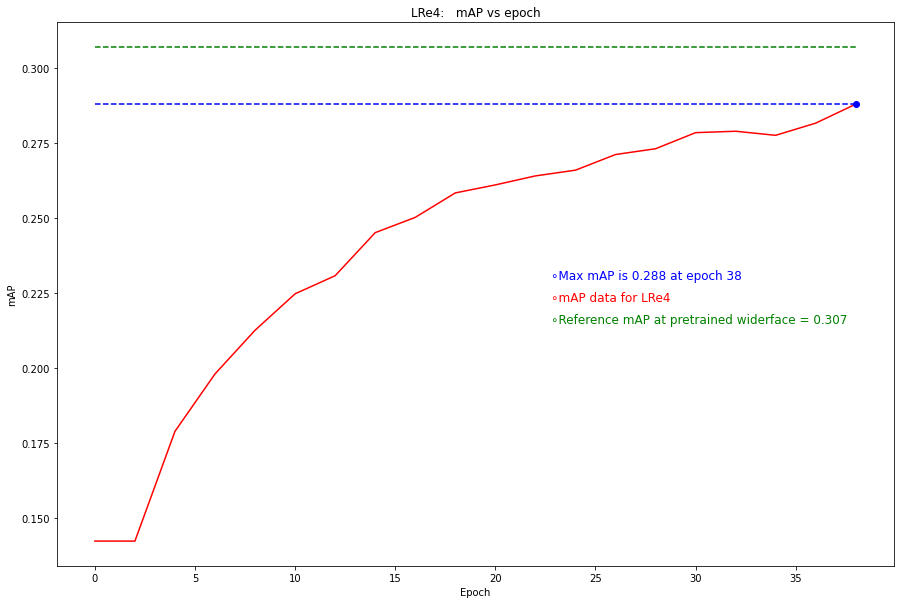

2 ==============>	 0.26749598491314674
4 ==============>	 0.28346748668138966
6 ==============>	 0.29627181816881143
8 ==============>	 0.30688195136463
10 ==============>	 0.3030980024845725
12 ==============>	 0.2978900138228159
14 ==============>	 0.31398258934774576
16 ==============>	 0.29588189923793873
18 ==============>	 0.30440549083458096
20 ==============>	 0.28562891419335984
22 ==============>	 0.31761116477491924
24 ==============>	 0.30560790605055427
26 ==============>	 0.3127998951682428
28 ==============>	 0.30334998418778747
30 ==============>	 0.3113492560993244
32 ==============>	 0.3068009898215212
34 ==============>	 0.29393692436391883
36 ==============>	 0.3112367048091709
38 ==============>	 0.2934426928019503


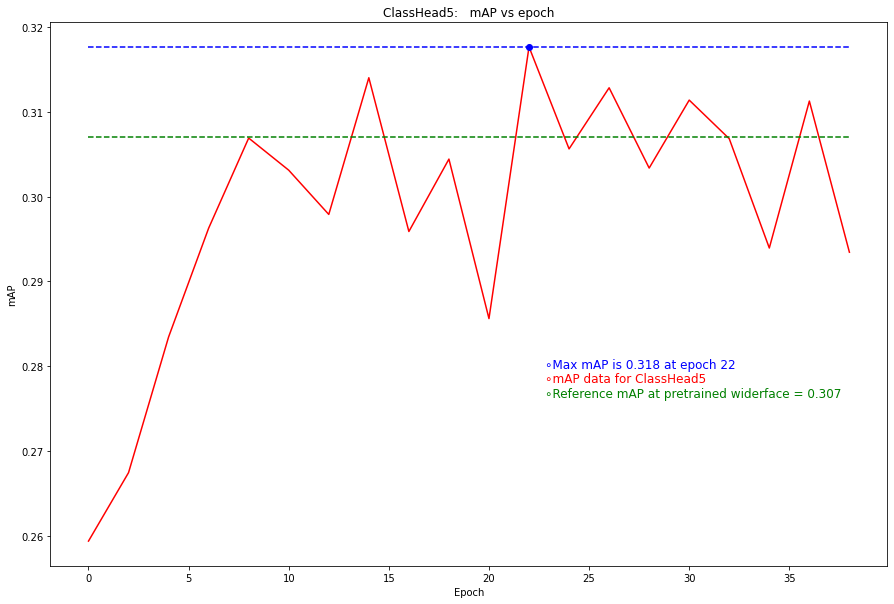

2 ==============>	 0.037563898274376464
4 ==============>	 0.06984518294693842
6 ==============>	 0.09553576417389971
8 ==============>	 0.1129351307349364
10 ==============>	 0.12981884272918195
12 ==============>	 0.14262092670042942
14 ==============>	 0.14981261248644265
16 ==============>	 0.15110938043175332
18 ==============>	 0.1620543825550723
20 ==============>	 0.16482531725145583
22 ==============>	 0.16934266145407856
24 ==============>	 0.17305664014290761
26 ==============>	 0.17761464584115613
28 ==============>	 0.1809290368628421
30 ==============>	 0.18479012410307522
32 ==============>	 0.1852077071527107
34 ==============>	 0.18791201189041878
36 ==============>	 0.1879494510277401
38 ==============>	 0.19037724045513058


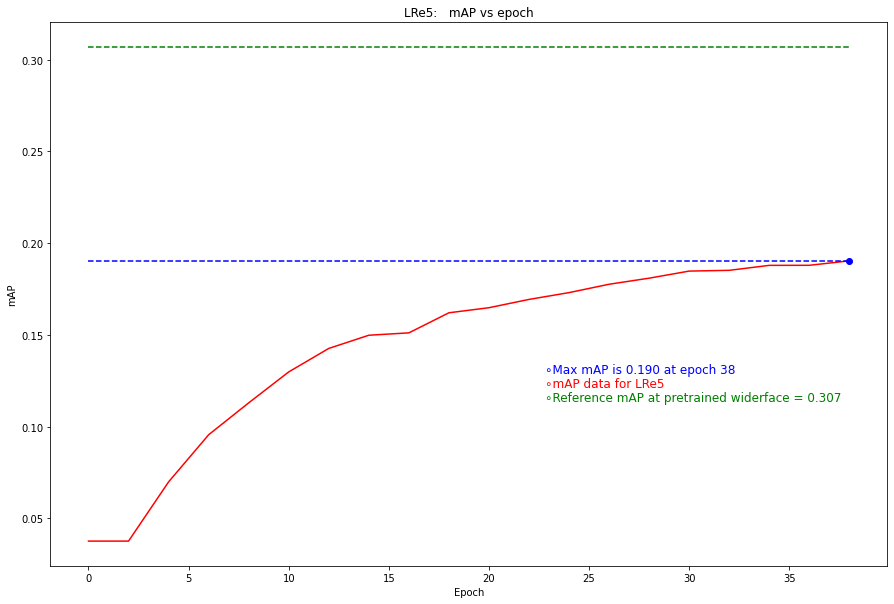

In [0]:
current_Tuned_Models=["Adam_lre3","Adam_WC1","LRe4","ClassHead5","LRe5"]
for m in current_Tuned_Models:
    mAP_plotter(m)

1 ==============>	 0.3080215631632822
2 ==============>	 0.29207928219432
3 ==============>	 0.30311035768676653
4 ==============>	 0.31763076501424337
5 ==============>	 0.3045332966862796
6 ==============>	 0.3004032426648862
7 ==============>	 0.3077715227320544
8 ==============>	 0.31539861894654675
9 ==============>	 0.29079354076311975
10 ==============>	 0.3101587500168535
20 ==============>	 0.3200584080238403
30 ==============>	 0.29701574652299145
40 ==============>	 0.3083845561777807


Text(0, 0.5, 'mAP')

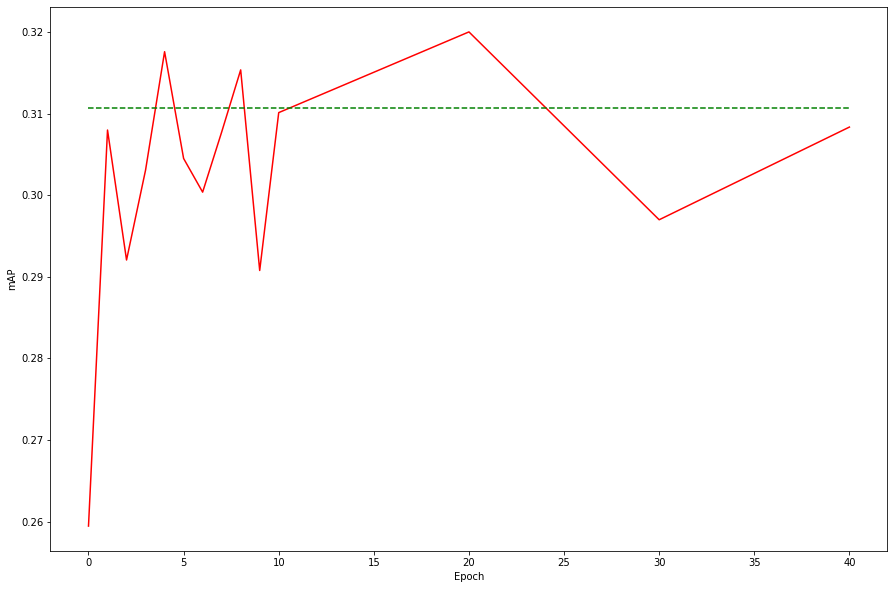

In [0]:

ep=[]
maps=[]
ref=[]
# read reference
a=open("Resnet50_Final/results.txt".format(i))
refMAP=float(lines[11].strip("mAP is : "))
# print(refMAP)
a.close()
ep.append(0)
maps.append(0.25943780658844107)
ref.append(refMAP)
j=1
while(j<=13):
    i=j
    if(j==11):
        i=20
    elif(j==12):
        i=30
    elif(j==13):
        i=40
    ep.append(i)
    ref.append(refMAP)
    a=open("Resnet50_epoch_{}_noGrad/results.txt".format(i))

    lines=a.readlines()
    print(i,"==============>\t",float(lines[11].strip("mAP is : ")))
    maps.append(float(lines[11].strip("mAP is : ")))
    a.close()
    j+=1

import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (15,10)
# for x in a:
#     # plotting the points  
plt.plot(ep,maps,"r") #x,y
plt.plot(ep,ref,"g",linestyle="dashed") #x,y
# plt.set_xlim([0,20])
# plt.plot(ep,vl,"g")

# naming the x axis 
plt.xlabel('Epoch') 
# naming the y axis 
plt.ylabel('mAP') 
    
#     # # giving a title to my graph 
#     # plt.title("IOU at "+ x+", with AP= "+(str)(area[x])) 
#     # plt.savefig("/home/jatin/Desktop/Pytorch_Retinaface/widerface_evaluate/"+model+"/graphs/IOU:"+ x+".jpg")
#     # function to show the plot 
#     plt.show() 

In [0]:
cd 

In [0]:
%%writefile imgsaver.py
import os

i=6
while(i<=40):
    if(i==40):
        # os.system("python test_widerface.py --trained_model \'./weights/Resnet50_Finally_FT_LRe4.pth\'".format(i))
        ok=1
    else:

        os.system("python test_widerface.py --trained_model \'./weights/Resnet50_epoch_{}_noGrad_FT_Adam_WC1.pth\'".format(i))
    i+=2

Writing imgsaver.py


In [0]:
!python imgsaver.py

python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't open file 'test_widerface.py': [Errno 2] No such file or directory
python3: can't o

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


Text(0, 0.5, 'LOSS')

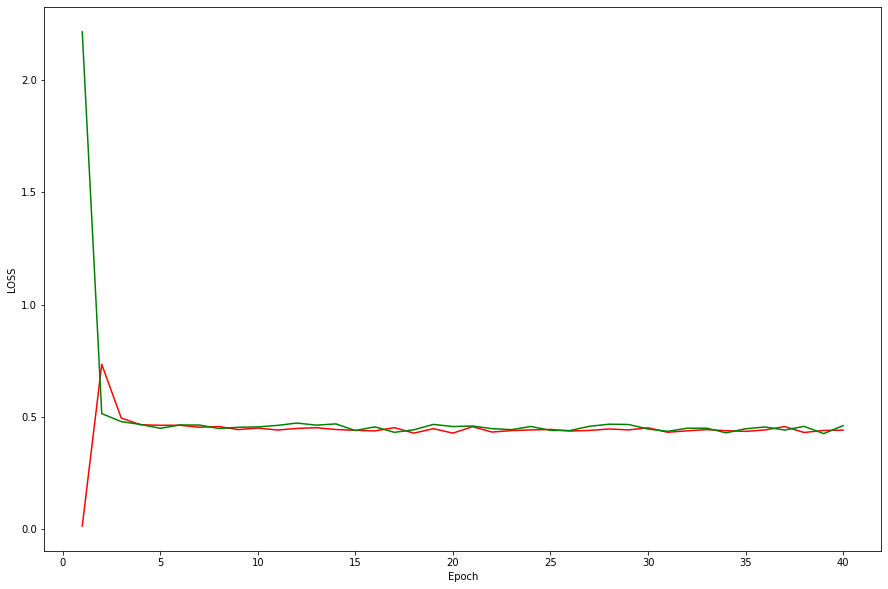

In [0]:
import pickle
fileName="newFineTuneHeads.pickle"
f=open(fileName,"rb")

lossCollec=pickle.load(f)

f.close()

lossCollec
ep=[]
vl=[]
tl=[]
for ls in lossCollec:
    ep.append(ls["Epoch"])
    tl.append(ls["TrainLoss"]/1231)
    vl.append(ls["ValLoss"]/351)
print(ep)

import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = (15,10)
# for x in a:
#     # plotting the points  
plt.plot(ep,tl,"r") #x,y
plt.plot(ep,vl,"g")

# naming the x axis 
plt.xlabel('Epoch') 
# naming the y axis 
plt.ylabel('LOSS: Train(r), Validation(g)') 
    
# giving a title to my graph 
plt.title("Loss(per image) Vs Epoch ") 
plt.savefig("./graphs/Loss_per_image"+ fileName.strip(".pickle")+".jpg")
# function to show the plot 
plt.show() 


In [0]:
cd /content/drive/My Drive/RetinaFace/Pytorch_Retinaface

/content/drive/My Drive/RetinaFace/Pytorch_Retinaface


In [0]:
!python test_widerface.py --trained_model './weights/Resnet50_epoch_40_noGrad.pth'

Loading pretrained model from ./weights/Resnet50_epoch_40_noGrad.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1),